### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Standadizing the data
#### 3. The elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# create a path
path = r'/Users/aibee/Desktop/CareerFoundry/6. Advanced Analytics & Dashboard Design /6.1 Sourcing Open Data'

In [4]:
# load data
df = pd.read_csv(os.path.join(path,'boat_data_cleaned.csv'), index_col = False)

In [5]:
df.head(5)

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee


#### Data Cleaning

In [6]:
# Drop the redundant columns
df1 = df.drop(['Unnamed: 0'],axis = 1)

In [7]:
# Rename the columns.
df1.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)

In [8]:
df1.head(5)

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,7days_views,EUR_price,Country,City
0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt
1,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern
2,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen
3,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda
4,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee


In [9]:
df = df1[['Length','Width','7days_views','EUR_price']]

In [10]:
df

,Length,Width,7days_views,EUR_price
0,4.00,1.50,75,3490.00
1,3.55,1.46,58,3399.00
2,4.35,1.75,239,3570.00
3,4.70,2.00,69,3500.00
4,4.40,1.65,113,4692.00
...,...,...,...,...
5996,7.20,2.70,1299,5100.00
5997,6.00,2.10,1917,5098.98
5998,6.00,1.62,288,5049.00
5999,4.40,1.80,354,4499.00


In [11]:
df.shape

(6001, 4)

### 2. Standadizing the data


In [12]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-1.41005333 -1.76743232 -0.52645641 -0.36246306]
 [-1.50289423 -1.8047781  -0.62569917 -0.36260574]
 [-1.33784374 -1.53402117  0.43094436 -0.36233764]
 ...
 [-0.99742711 -1.65539497  0.71699703 -0.36001879]
 [-1.32752808 -1.48733894  1.10229246 -0.3608811 ]
 [-1.49257857 -1.67406786  0.16824293 -0.36188986]]


In [13]:
# coverting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

        Length     Width  7days_views  EUR_price
0    -1.410053 -1.767432    -0.526456  -0.362463
1    -1.502894 -1.804778    -0.625699  -0.362606
2    -1.337844 -1.534021     0.430944  -0.362338
3    -1.265634 -1.300610    -0.561483  -0.362447
4    -1.327528 -1.627386    -0.304620  -0.360579
...        ...       ...          ...        ...
5996 -0.749851 -0.647059     6.619022  -0.359939
5997 -0.997427 -1.207246    10.226789  -0.359940
5998 -0.997427 -1.655395     0.716997  -0.360019
5999 -1.327528 -1.487339     1.102292  -0.360881
6000 -1.492579 -1.674068     0.168243  -0.361890

[6001 rows x 4 columns]


### 3. The elbow technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-24004.000000000007,
 -15675.36192161695,
 -11918.836989024543,
 -9074.40077714726,
 -7104.919930442594,
 -6077.731731616942,
 -5349.971113612155,
 -4634.285263057959,
 -4124.639426271732]

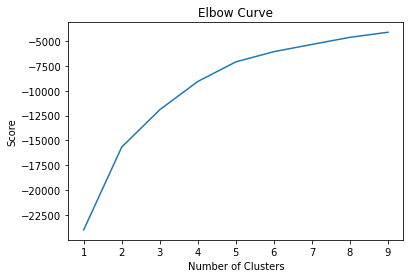

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The is a noticable straighten line on the x-axis after 5. Therefore, the optimal count for your clusters is five.

### 4. k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=5)

In [19]:
df['clusters'] = kmeans.fit_predict(df)

In [20]:
df.head()

,Length,Width,7days_views,EUR_price,clusters
0,-1.410053,-1.767432,-0.526456,-0.362463,0
1,-1.502894,-1.804778,-0.625699,-0.362606,0
2,-1.337844,-1.534021,0.430944,-0.362338,0
3,-1.265634,-1.300610,-0.561483,-0.362447,0
4,-1.327528,-1.627386,-0.304620,-0.360579,0


In [21]:
df['clusters'].value_counts()

0    2922
2    2233
1     495
4     321
3      30
Name: clusters, dtype: int64

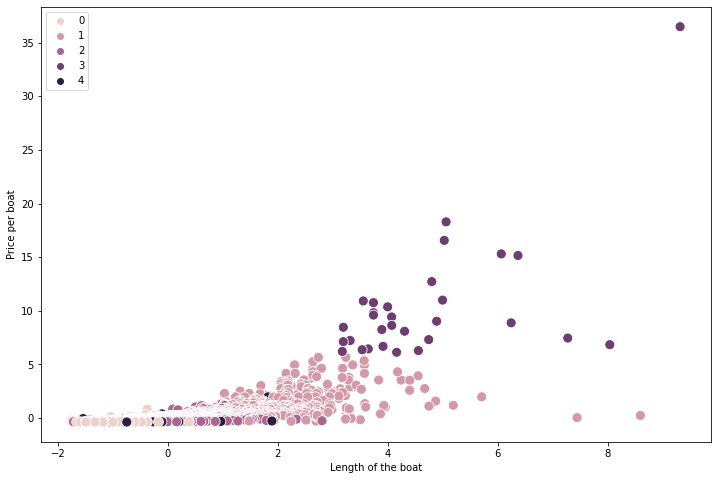

In [22]:
# Plot the clusters for the "EUR_price" and "Length" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['EUR_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of the boat') # Label x-axis.
plt.ylabel('Price per boat') # Label y-axis.
plt.show()

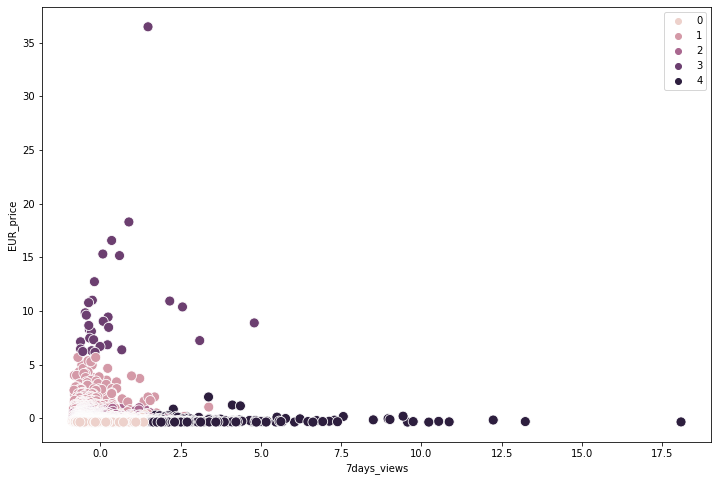

In [23]:
# Plot the clusters for the "7days_views" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['7days_views'], y=df['EUR_price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('7days_views') 
plt.ylabel('EUR_price') 
plt.show()

##### Explaining the graph

#### The two graphs does not entirely makes sense or give a great insight to the relationship between the cost of the boat and either of the Length or Views of each boat. This gives a suggestion that there are other important factors that are inclusively and would all together be determinant of the boat price

In [24]:
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'dent purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'whitish purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'whitish pink'

In [25]:
df.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         '7days_views':['mean', 'median'],
                          'EUR_price':['mean', 'median']})

Length               Width           7days_views            \
                    mean    median      mean    median        mean    median   
cluster                                                                        
dark purple    -0.529302 -0.646695 -0.547499 -0.749760    3.057831  2.427475   
dent purple     4.686912  4.116043  3.758810  3.451641    0.398253 -0.091540   
purple          0.438586  0.399313  0.572144  0.566679   -0.301156 -0.398025   
whitish pink   -0.681999 -0.692084 -0.740577 -0.787105   -0.050637 -0.170350   
whitish purple  2.106539  1.926030  1.917880  1.715062   -0.349636 -0.473916   

                EUR_price            
                     mean    median  
cluster                              
dark purple     -0.241486 -0.309924  
dent purple     10.398493  8.764783  
purple          -0.023679 -0.077883  
whitish pink    -0.269052 -0.292043  
whitish purple   1.221431  0.886030

#### As explained earlier, the data does not suggest a great insight as to the relationship between the columns. However, the dark blue cluster returned best stats out of the lots. The median number of lengths, width and price is highest and significantly larger than the other four. This is interest has length and width would determine the size of a boat and this could be proportionate to price. In general, there are other important characteristics variables to be considered in assessing the price of the boats.

#### This analysis has given more insight into the need to explore further the other categorical variables in dataframe in other to discover the actual determinant of the cost or views recieved by each boat. 